<a href="https://colab.research.google.com/github/MollaMohammadIbrahim/MachineLearning/blob/main/digitClassification-lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraries and mnist data**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print("Number of training images:", x_train.shape[0])
print("Number of test images:", x_test.shape[0])


Number of training images: 60000
Number of test images: 10000


#**ploting some data from dataset**

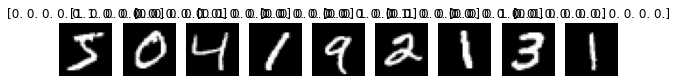

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(1,9,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.show()


#**Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [ ]:


augmented_images = []
augmented_labels = []

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=60000):
    augmented_images.append(x_batch)
    augmented_labels.append(y_batch)
    break

augmented_images = np.concatenate(augmented_images)
augmented_labels = np.concatenate(augmented_labels)

x_train_augmented = np.concatenate([x_train, augmented_images])
y_train_augmented = np.concatenate([y_train, augmented_labels])


In [ ]:
print("Number of training images after augmentation:", x_train_augmented.shape[0])
print("Number of training images before augmentation:", x_train.shape[0])


Number of training images after augmentation: 120000
Number of training images before augmentation: 60000


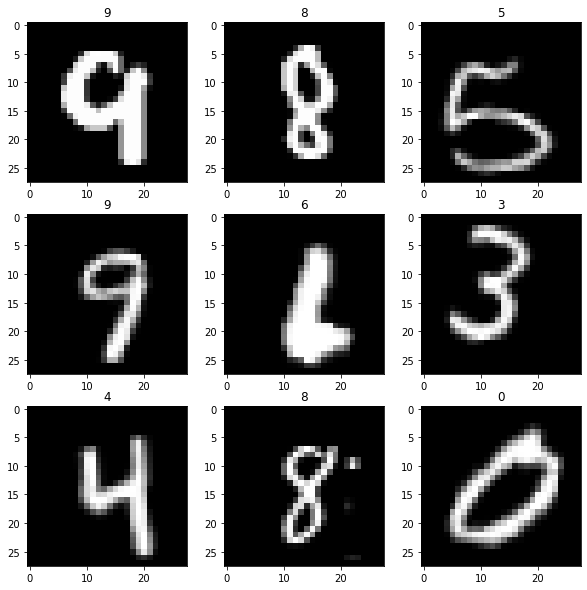

In [ ]:
idx = np.random.randint(0, len(x_train_augmented), size=9)
images = x_train_augmented[idx]
labels = y_train_augmented[idx]

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    # plt.axis('off')
    plt.title(str(np.argmax(labels[i])))
plt.show()


#**Model Desighn**#

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train_augmented,y_train_augmented, epochs=50, batch_size=128)


Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 0.3934 - accuracy: 0.8816
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1546 - accuracy: 0.9532
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1158 - accuracy: 0.9645
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0913 - accuracy: 0.9721
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0767 - accuracy: 0.9762
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0661 - accuracy: 0.9790
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0572 - accuracy: 0.9816
Epoch 8/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0499 - accuracy: 0.9837
Epoch 9/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0449 - accuracy: 0.9851
Epoch 10/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0386 - accuracy: 0.9874

#**Model Evaluation**

##**Model Evaluation with augmented test data set**





In [ ]:
test_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [ ]:

test_datagen.fit(x_test)

test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


313/313 [==============================] - 4s 14ms/step - loss: 0.2562 - accuracy: 0.9629
Test accuracy: 0.9628999829292297


In [ ]:
model.fit(x_train,y_train, epochs=50, batch_size=128)


##**Model evaluation without augmented training dataset**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


313/313 [==============================] - 5s 15ms/step - loss: 0.4375 - accuracy: 0.9437
Test accuracy: 0.9437000155448914
